In [36]:
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np


In [37]:
# Constants
DATA_DIRECTORY = os.getcwd() + '/Data'    
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [38]:
def load_audio(audio_path):
     audio_time_series, sampling_rate = librosa.load(audio_path)
     return audio_time_series, sampling_rate

The nfft and hop length were taken from a few tutorials and resources I followed as I was programming. I tinkered a bit and found that these results looked the best, though if you guys find something better please go ahead and update!

In [39]:
def create_melspectrogram(y, sr):
     mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
     # db = decibel units
     mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
     return mel_spectrogram_db

In [40]:
def plot_melspectrogram(M_db, audio_name):
    figure, axes_array = plt.subplots()
    img = librosa.display.specshow(M_db, x_axis='time', y_axis='mel', ax=axes_array, fmax=8000)
    axes_array.set(title=audio_name)
    figure.colorbar(img, ax=axes_array, format="%+2.f dB")

    return figure

I was able to save the spectrograms into an Images directory after it is plotted. I figured this would come in handy when we implement it as a tensorflow dataset so that we can easily extract the labels. Basically I wanted to set this up in a way where Brandon's code can still be used. Rather than the dataset being created with audio, it'll be using the image data instead. :) 

In [41]:
def save_melspectrogram(fig, genre, audio_name):
    genre_images_path = os.getcwd() + '/Images/' + genre + '/'
    image_name = audio_name.replace('wav', 'png')
    full_path = genre_images_path + image_name

    if not os.path.exists(genre_images_path):
        os.makedirs(genre_images_path)
    
    if not os.path.exists(full_path):
        fig.savefig(full_path)
    

Only looping through 2 songs from each genre because Jupyter doesn't like a ton of output. The splice will need to be removed in the next MR.

In [42]:
def process_genre_audio(genre):
    genre_directory = os.path.join(DATA_DIRECTORY, genre)
    audio_names = os.listdir(genre_directory)
    sorted_audio_names = sorted(audio_names)

    for audio_name in sorted_audio_names[:2]:
         audio_path = genre_directory + '/' + audio_name
         audio_time_series, sampling_rate = load_audio(audio_path)
         mel_spectrogram_db = create_melspectrogram(audio_time_series, sampling_rate)
         figure = plot_melspectrogram(mel_spectrogram_db, audio_name)
         save_melspectrogram(figure, genre, audio_name)

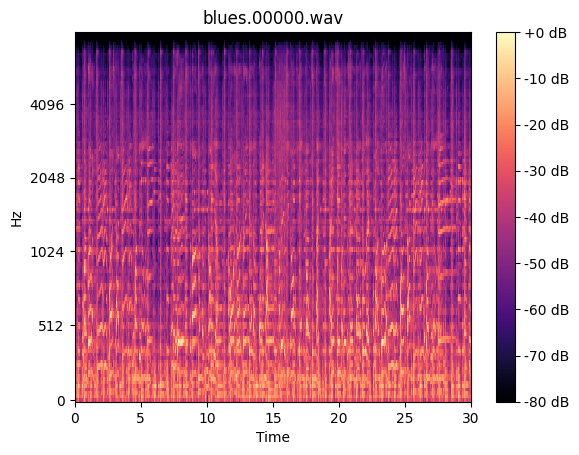

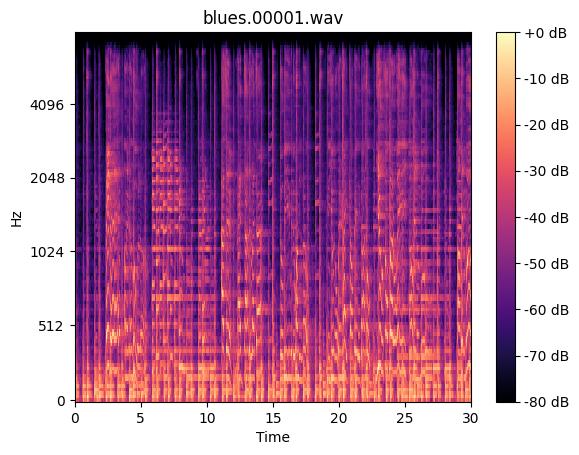

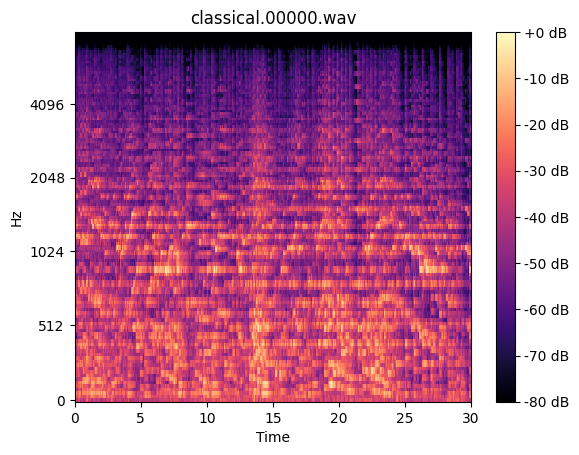

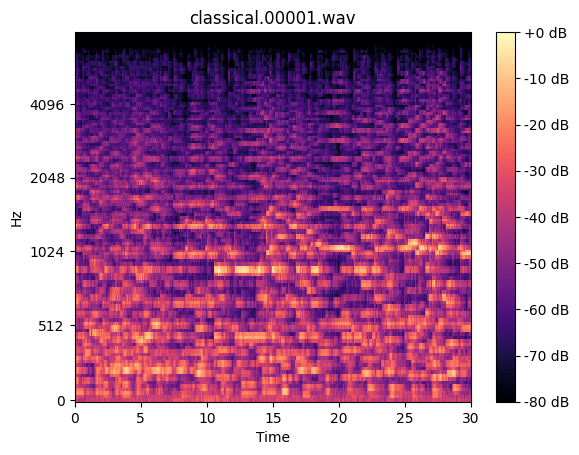

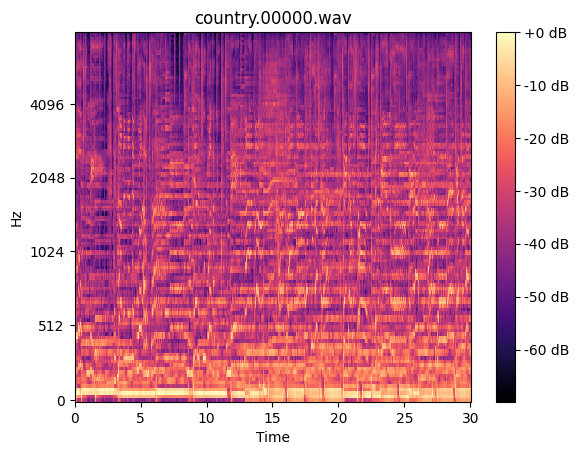

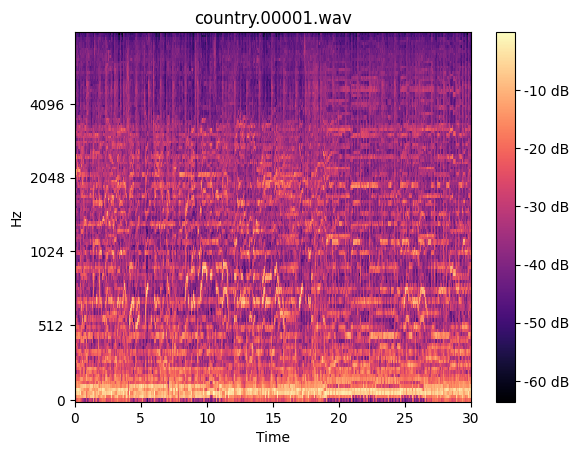

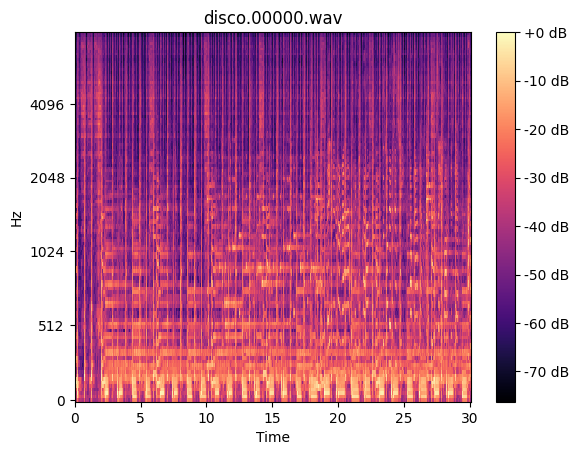

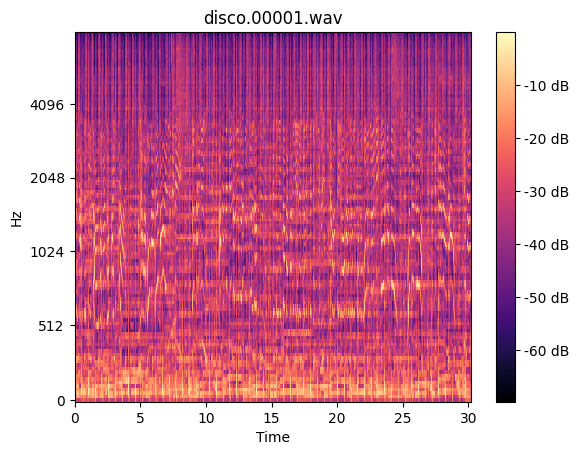

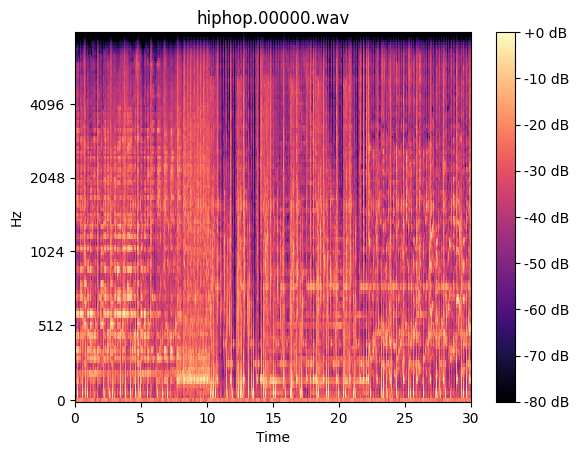

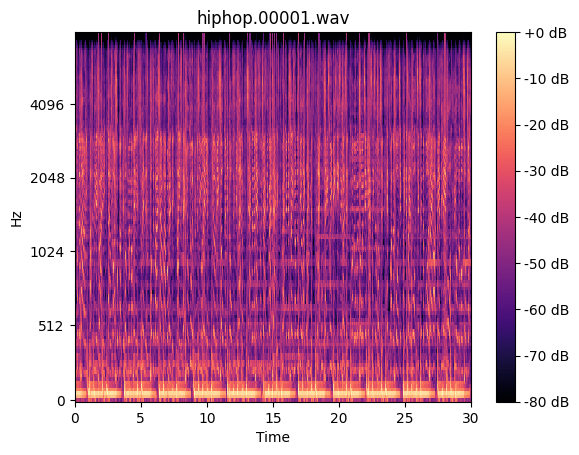

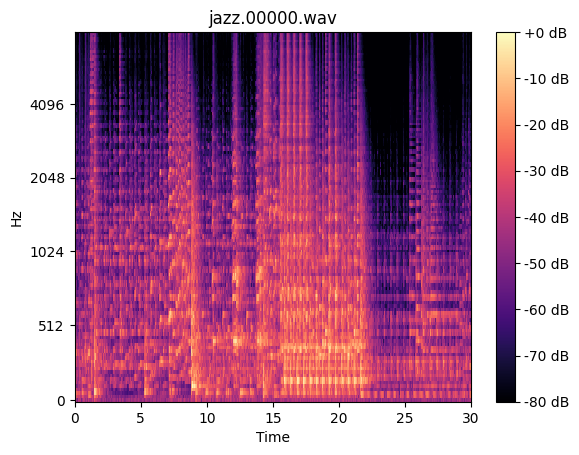

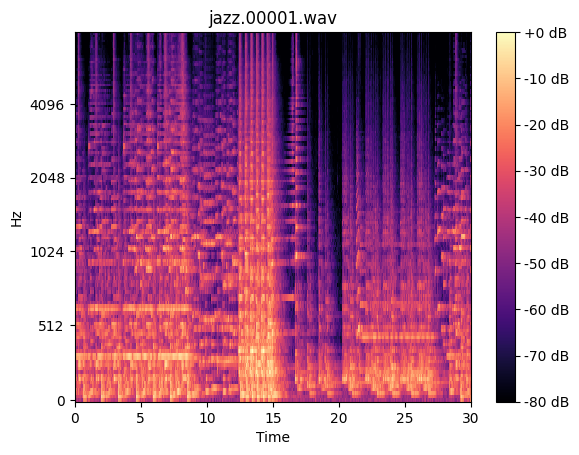

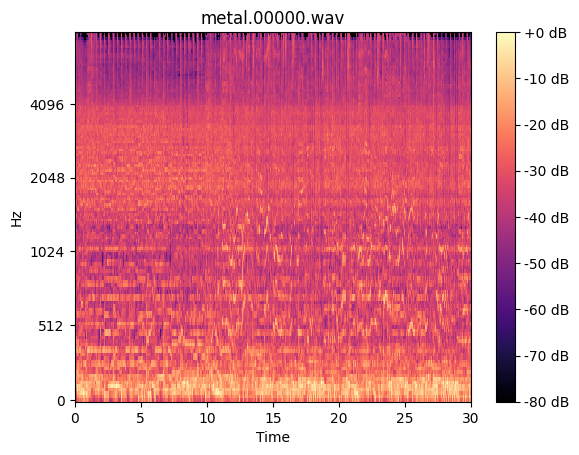

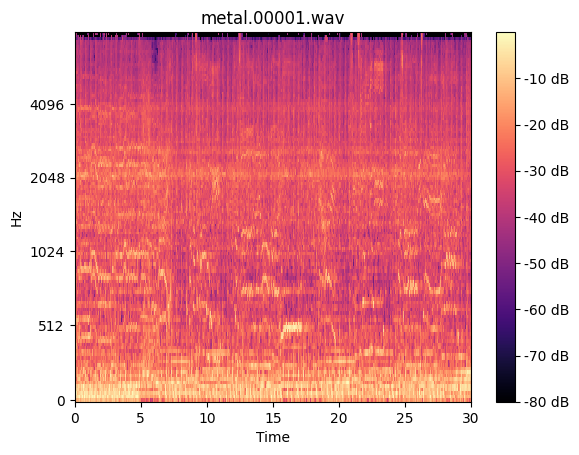

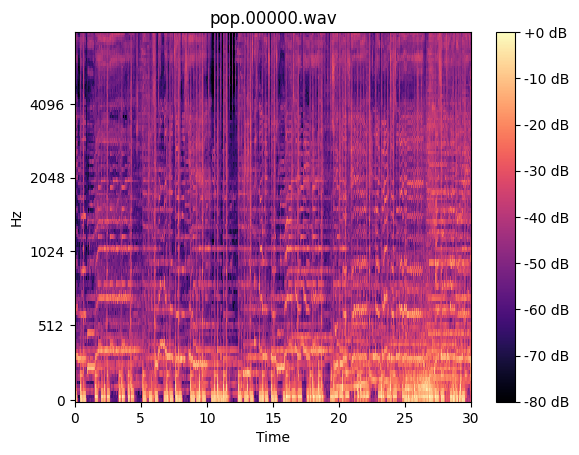

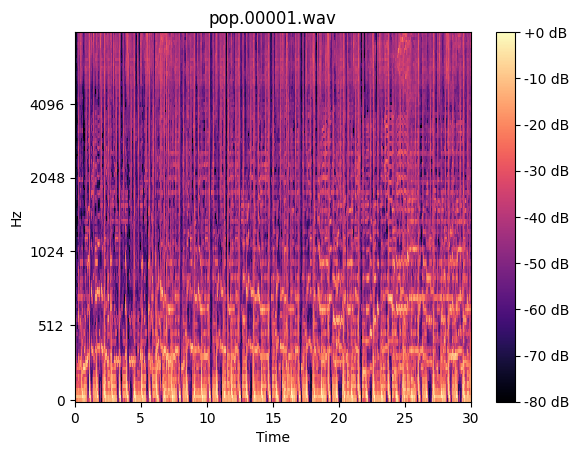

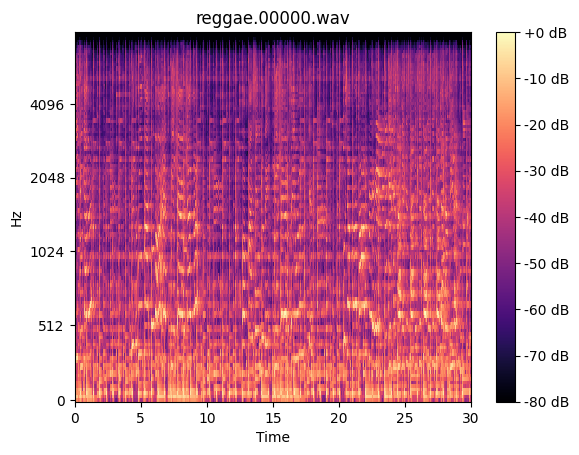

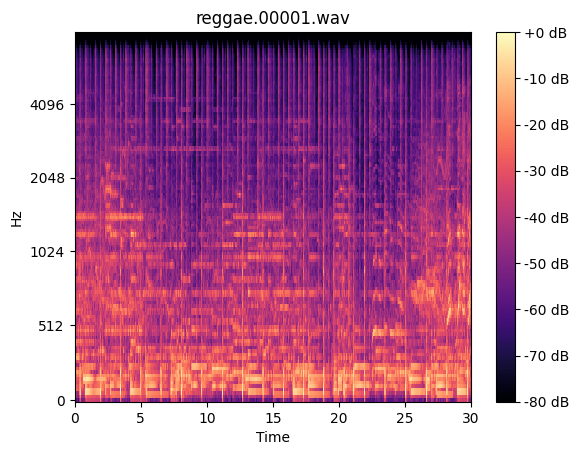

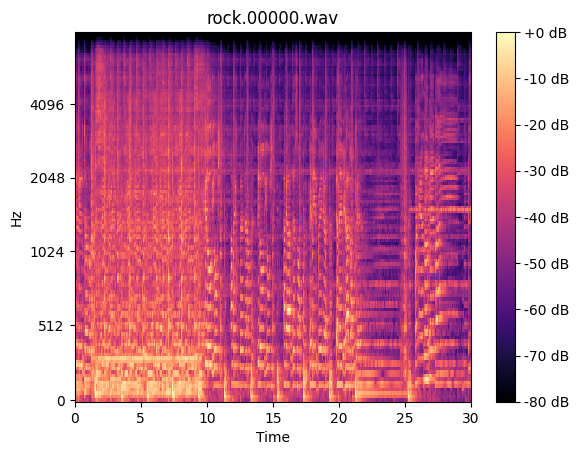

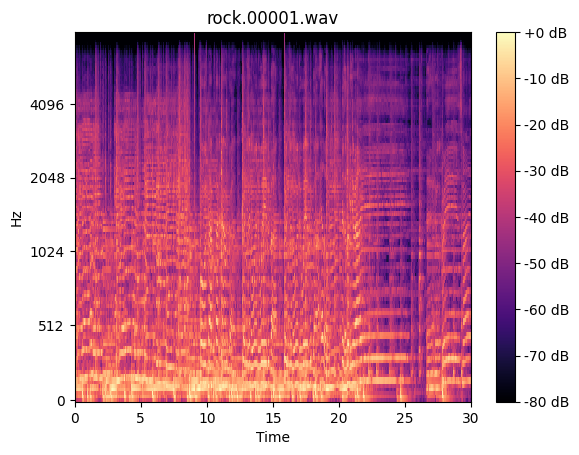

In [43]:
for genre in GENRES:
    process_genre_audio(genre)